In [1]:
import numpy as np
import pandas as pd
#import matplotlib.cn as cn
import matplotlib.pyplot as plt


In [2]:
data_train=pd.read_csv("train.csv")

In [3]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
data_train.shape

(14999, 9)

In [5]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)


In [6]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [7]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [8]:
data_train["views"]=pd.to_numeric(data_train["views"])
data_train["comment"]=pd.to_numeric(data_train["comment"])
data_train["likes"]=pd.to_numeric(data_train["likes"])
data_train["dislikes"]=pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [9]:
column_vidid=data_train["vidid"]

In [10]:
import sklearn

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

In [13]:
import datetime
import time

In [14]:
def checki(x):
    y=x[2:]
    h=''
    m=''
    s=''
    mm=''
    P=['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h=mm
                mm=''
            elif(i=='M'):
                m=mm
                mm=''
            else:
                s=mm
                mm=''
    if(h==''):
        h='00'
    if(m==''):
        m='00 '
    if(s==''):
        s='00'
    bp=h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp=pd.read_csv("train.csv")["duration"]
time=mp.apply(checki)


In [15]:
def fun_sec(time_string):
    h,m,s=time_string.split(':')
    return int(h)*3600 + int(m)*60+int(s)

time1=time.apply(fun_sec)
data_train["duration"]=time1


In [16]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


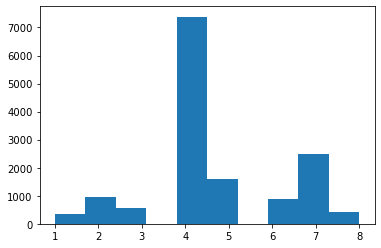

In [17]:
plt.hist(data_train["category"])
plt.show()

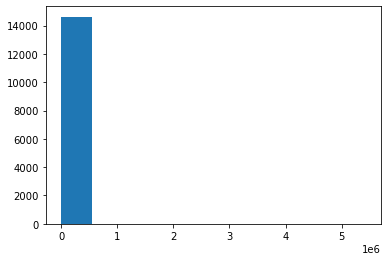

In [18]:
plt.hist(data_train["adview"])
plt.show()

In [19]:
data_train=data_train[data_train["adview"]<2000000]

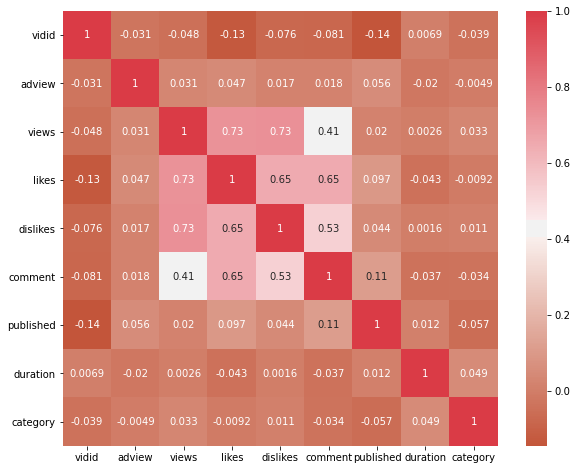

In [20]:
import seaborn as sns
f,ax=plt.subplots(figsize=(10,8))
corr = data_train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool), cmap=sns.diverging_palette(20,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show()

In [21]:
Y_train=pd.DataFrame(data=data_train.iloc[:,1].values,columns=['target'])
data_train=data_train.drop("adview",axis=1)
data_train=data_train.drop("vidid",axis=1)
data_train.head()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_train,Y_train,test_size=0.2,random_state=42)
X_train.shape


(11708, 7)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

In [23]:
from sklearn import metrics
def print_error(X_test,y_test,model_name):
    prediction=model_name.predict(X_test)
    print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,prediction))
    print("Mean Squared Error:",metrics.mean_squared_error(y_test,prediction))
    print("Root Mean Absolute Error:",np.sqrt(metrics.mean_absolute_error(y_test,prediction)))

In [24]:
from sklearn import linear_model
linear_regression=linear_model.LinearRegression()
linear_regression.fit(X_train,y_train)
print_error(X_test,y_test,linear_regression)


Mean Absolute Error: 3707.378005824537
Mean Squared Error: 835663131.1210335
Root Mean Absolute Error: 60.88824193409214


In [25]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
print_error(X_test,y_test,decision_tree)


Mean Absolute Error: 2537.3883196721313
Mean Squared Error: 870178930.1895492
Root Mean Absolute Error: 50.37249566650566


In [26]:
from sklearn.svm import SVR
supportvector_regressor=SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test,linear_regression)


c:\users\admin\pycharmprojects\machinelearning\venv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean Absolute Error: 3707.378005824537
Mean Squared Error: 835663131.1210335
Root Mean Absolute Error: 60.88824193409214


In [27]:
from sklearn.ensemble import RandomForestRegressor
n_estimators=200
max_depth=25
min_samples_split=15
min_samples_leaf=2
random_forest=RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,
                                    min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test,random_forest)


<ipython-input-27-10d4f0c4472f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3416.395102821453
Mean Squared Error: 719033282.4776983
Root Mean Absolute Error: 58.44993672213386


In [28]:
import keras
from keras.layers import Dense


ModuleNotFoundError: No module named 'keras'